In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
data = pd.read_csv('/customer_churn.csv')

In [10]:
# Display basic info about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Task A**

In [5]:
# a. Total number of male customers
male_customers = data[data['gender'] == 'Male'].shape[0]
print("Total Male Customers:", male_customers)

Total Male Customers: 3555


In [6]:
# b. Total number of customers with Internet Service as 'DSL'
dsl_customers = data[data['InternetService'] == 'DSL'].shape[0]
print("Total Customers with DSL Internet Service:", dsl_customers)

Total Customers with DSL Internet Service: 2421


In [7]:
# c. Female senior citizens with Payment Method as Mailed check
new_customer_female_seniors = data[(data['gender'] == 'Female') &
                                   (data['SeniorCitizen'] == 1) &
                                   (data['PaymentMethod'] == 'Mailed check')]
print("Female Senior Citizens with Mailed Check Payment:\n", new_customer_female_seniors)

Female Senior Citizens with Mailed Check Payment:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139   0390-DCFDQ  Female              1     Yes         No       1   
176   2656-FMOKZ  Female              1      No         No      15   
267   3197-ARFOY  Female              1      No         No      19   
451   5760-WRAHC  Female              1      No         No      22   
470   4933-IKULF  Female              1      No         No      17   
694   2682-KEVRP  Female              1      No         No      22   
747   3966-HRMZA  Female              1      No         No       3   
947   9904-EHEVJ  Female              1     Yes        Yes      32   
1029  4184-TJFAN  Female              1     Yes        Yes       3   
1112  2176-LVPNX  Female              1      No         No      71   
1513  0661-XEYAN  Female              1      No         No       1   
1811  2070-XYMFH  Female              1      No         No      23   
1831  3402-XRIUO  Female              1

In [9]:
# d. Customers with Tenure < 10 or Total Charges < $500

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

new_customer_short_tenure = data[(data['tenure'] < 10) | (data['TotalCharges'] < 500)]
print("Customers with Tenure < 10 or Total Charges < $500:\n", new_customer_short_tenure)

Customers with Tenure < 10 or Total Charges < $500:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
7     6713-OKOMC  Female              0      No         No      10   
...          ...     ...            ...     ...        ...     ...   
7029  2235-DWLJU  Female              1      No         No       6   
7030  0871-OPBXW  Female              0      No         No       2   
7032  6894-LFHLY    Male              1      No         No       1   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No  No pho

***Task B: Data Visualization***


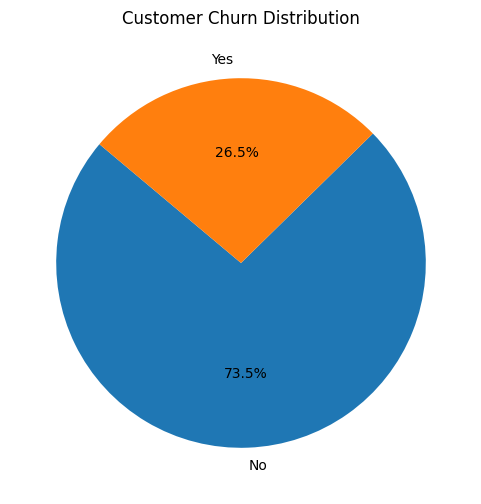

In [11]:
# a. Pie chart showing customer churn distribution
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Churn Distribution")
plt.show()

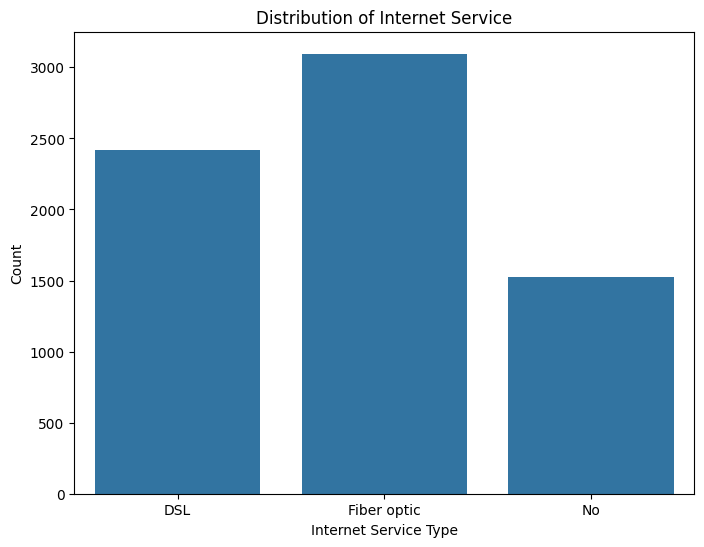

In [12]:
# b. Bar plot showing Internet Service distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=data)
plt.title("Distribution of Internet Service")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

***Task C: Model Building in Keras***


In [13]:
# Convert 'Churn' to binary format and split data into train and test sets
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X1 = data[['tenure']].values
y = data['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Model 1: Sequential Model (Single Hidden Layer)***


In [14]:
# Model 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim=1, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

# Evaluating Model 1
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix for Model 1:\n", conf_matrix1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6944 - loss: 0.5922 - val_accuracy: 0.7353 - val_loss: 0.5072
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5134 - val_accuracy: 0.7566 - val_loss: 0.5002
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7451 - loss: 0.5091 - val_accuracy: 0.7566 - val_loss: 0.4980
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.5126 - val_accuracy: 0.7566 - val_loss: 0.4979
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7495 - loss: 0.5087 - val_accuracy: 0.7566 - val_loss: 0.4979
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7425 - loss: 0.5088 - val_accuracy: 0.7537 - val_loss: 0.4970
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7527 - loss: 0.5138 - val_accuracy: 0.7346 - val_loss: 0.4985
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7438 - loss: 0.5081 - val_accu

***Model 2: Sequential Model with Dropout Layers***


In [15]:
# Model 2 with Dropout
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim=1, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6141 - loss: 0.6507 - val_accuracy: 0.7353 - val_loss: 0.5274
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 0.5503 - val_accuracy: 0.7353 - val_loss: 0.5070
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7391 - loss: 0.5343 - val_accuracy: 0.7353 - val_loss: 0.5028
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7404 - loss: 0.5317 - val_accuracy: 0.7566 - val_loss: 0.5028
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7415 - loss: 0.5317 - val_accuracy: 0.7353 - val_loss: 0.4999
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7260 - loss: 0.5406 - val_accuracy: 0.7353 - val_loss: 0.5005
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.5332 - val_accuracy: 0.7353 - val_loss: 0.5007
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7437 - loss: 0.5161 - val_accuracy: 0.7353

In [16]:
# Evaluate Model 2
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix for Model 2:\n", conf_matrix2)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix for Model 2:
 [[982  54]
 [289  84]]


***Model 3: Sequential Model Using Multiple Features***

In [17]:
# Preparing data for Model 3
X2 = data[['tenure', 'MonthlyCharges', 'TotalCharges']].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)


In [18]:
# Model 3 with multiple features
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train2, y_train2, epochs=150, validation_data=(X_test2, y_test2))


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5792 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7330 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7391 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7363 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7307 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7335 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7315 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 9/150
177/177 ━━━━━━━━

In [19]:
# Evaluate Model 3
y_pred3 = (model3.predict(X_test2) > 0.5).astype("int32")
conf_matrix3 = confusion_matrix(y_test2, y_pred3)
print("Confusion Matrix for Model 3:\n", conf_matrix3)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix for Model 3:
 [[1036    0]
 [ 373    0]]


***Plotting Accuracy vs. Epochs for Each Model***

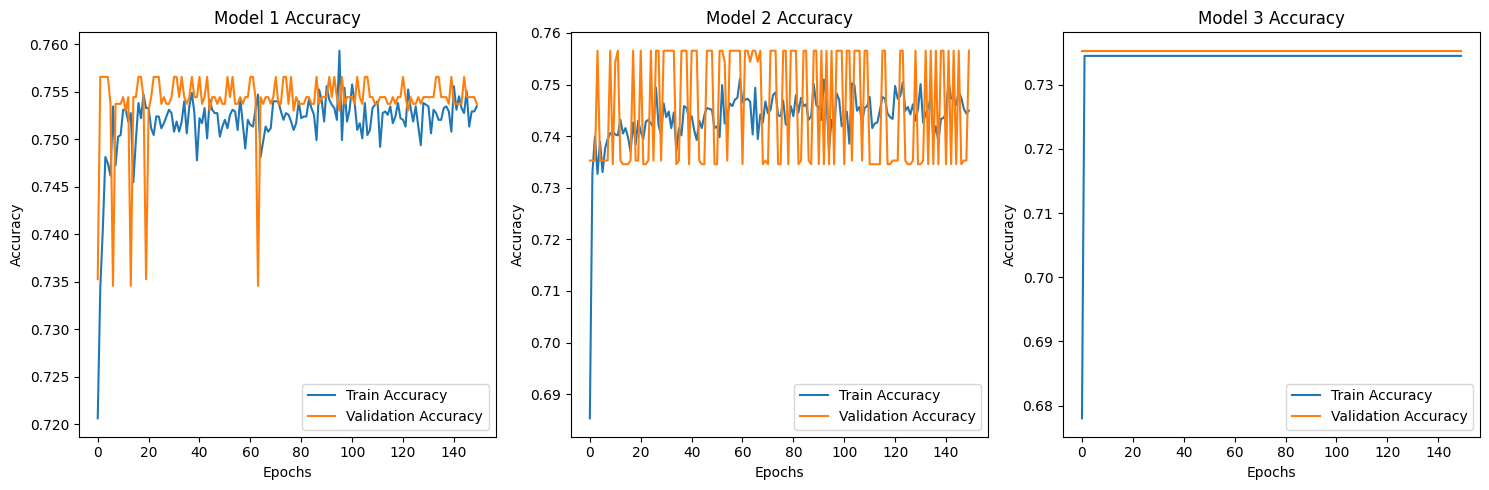

In [20]:
# Plot Accuracy vs Epochs for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()